In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv("./train.csv")

data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T  # Transpose the data
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.0
_, m_train = X_train.shape


def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2


def ReLU(Z):
    return np.maximum(0, Z)


def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def derive_ReLU(Z):
    return Z > 0


def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * derive_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2


def get_predictions(A2):
    return np.argmax(A2, 0)


def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(
            W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

    return W1, b1, W2, b2

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation="nearest")
    plt.show()





In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 1)

Prediction:  [7]
Label:  3


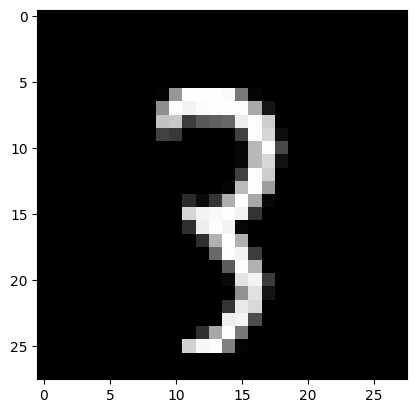

In [26]:
test_prediction(6134, W1, b1, W2, b2)


In [27]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 2 2 7 6 6 3 5 6 9 2 7 1 7 1 6 5 3 0 6 8 7 3 0 6 7 5 0 1 6 3 2 5 3 9 9 8
 7 4 6 0 6 5 7 7 5 4 8 7 0 7 3 8 1 7 1 1 4 3 6 6 3 9 3 8 0 5 2 1 3 0 2 6 5
 9 7 8 8 3 6 7 1 3 7 5 0 3 8 6 3 2 6 4 0 8 5 5 3 6 8 1 2 9 2 7 3 6 4 2 1 8
 7 0 9 3 2 0 2 6 2 9 6 5 3 9 0 9 9 1 9 9 5 8 4 3 4 3 7 5 0 3 2 4 8 2 7 2 7
 8 5 9 9 0 8 7 4 2 9 3 2 6 0 0 2 5 7 6 7 7 8 5 5 0 2 0 3 9 3 8 9 2 5 4 3 0
 8 8 7 2 2 1 5 0 7 8 2 9 2 2 9 1 9 7 4 0 7 6 4 2 1 7 8 8 7 2 4 7 2 0 3 3 4
 8 8 7 5 8 0 5 5 5 8 0 4 2 8 3 9 0 4 1 1 8 1 1 2 6 0 1 0 1 8 4 8 5 4 0 9 8
 8 6 7 4 2 6 1 7 0 9 5 0 4 1 1 3 3 8 3 6 6 9 5 8 9 2 3 8 1 3 1 2 5 3 0 6 1
 1 4 0 1 0 7 1 1 9 0 3 5 7 2 0 7 9 4 7 4 8 7 2 3 0 5 1 8 1 8 4 3 9 7 2 8 1
 2 5 9 4 1 3 9 7 0 3 1 5 1 4 7 3 7 3 4 5 2 6 8 8 8 3 7 9 2 9 9 1 8 6 9 4 6
 3 5 8 6 5 1 0 3 7 8 5 1 0 5 6 1 3 3 7 2 1 6 2 6 9 8 2 5 1 9 9 3 7 8 3 7 1
 4 9 4 5 9 4 7 9 6 3 1 8 2 9 8 0 8 8 7 8 3 1 1 0 8 7 7 2 2 9 8 9 4 6 6 0 5
 1 5 9 8 3 2 7 6 4 3 0 2 5 8 1 9 8 0 7 4 2 1 1 0 7 7 1 9 5 1 0 6 4 0 8 7 6
 4 6 2 2 6 6 2 0 5 6 8 0 

np.float64(0.891)